# Lecture F 

[Slide](Presentation%20F%20ANST%202025.pdf)

[R code](Lecture%20F.R)

### R

In [ ]:
# Slide 4:
salesdata<-read.csv2("../Data/Salesdata.csv")
names(salesdata)

[1] "growth" "profit" "new"    "create" "mech"   "abs"    "math"

In [ ]:
# Slide 6:
Y<-salesdata[,1:3]
X<-salesdata[,4:7]

In [ ]:
#Slide 7:

Sigmayy<-var(Y)
Sigmaxx<-var(X)
Sigmayx<-cov(Y,X)
Sigmaxy<-t(Sigmayx)

E1<-solve(Sigmayy)%*%Sigmayx%*%solve(Sigmaxx)%*%Sigmaxy
E2<-solve(Sigmaxx)%*%Sigmaxy%*%solve(Sigmayy)%*%Sigmayx
E1
E2

,growth,profit,new
growth,0.5241851,0.1481294,0.33088173
profit,0.1273726,0.8098589,-0.05362605
new,0.4729584,0.1452355,0.57317616


,create,mech,abs,math
create,0.3936913,0.04077489,0.21007893,0.3414371
mech,-0.1095057,0.20397352,-0.09896763,0.6466981
abs,0.4429526,-0.08171082,0.58337701,0.1264595
math,0.1160912,0.19365385,0.02750066,0.7261784


In [ ]:
# Slide 8:
(my.cor<-sqrt(eigen(E1)$values))

sqrt(round(eigen(E2)$values,digits=6))

[1] 0.9944827 0.8781065 0.3836057

[1] 0.9944828 0.8781065 0.3836053 0.0000000

In [ ]:
# Slide 9:

A<-eigen(E1)$vectors
B<-eigen(E2)$vectors[,1:3]

round(cov(as.matrix(Y)%*%A,as.matrix(X)%*%B),digits=4)
A[,2]<--A[,2]

72.9489,0.0000,0.0000
0.0000,-4.0158,0.0000
0.0000,0.0000,1.7533


In [ ]:
# Slide 10:

round(t(A)%*%Sigmayy%*%A,digits=4)
round(t(B)%*%Sigmaxx%*%B,digits=4)



A<-A%*%diag(1/sqrt(diag(t(A)%*%Sigmayy%*%A)))
B<-B%*%diag(1/sqrt(diag(t(B)%*%Sigmaxx%*%B)))

95.6643,0.0000,0.0000
0.0000,6.8621,0.0000
0.0000,0.0000,3.3337


56.2462,0.0000,0.0000
0.0000,3.0479,0.0000
0.0000,0.0000,6.2665


In [ ]:
# Slide 11:

A
B

0.06237788,-0.1740703,-0.3771529
0.02092564,0.2421641,0.1035150
0.07825817,-0.2382940,0.3834151


0.06974814,-0.19239132,0.24655659
0.03073830,0.20157438,-0.14189528
0.08956418,-0.49576326,-0.28022405
0.06282997,0.06831607,0.01133259


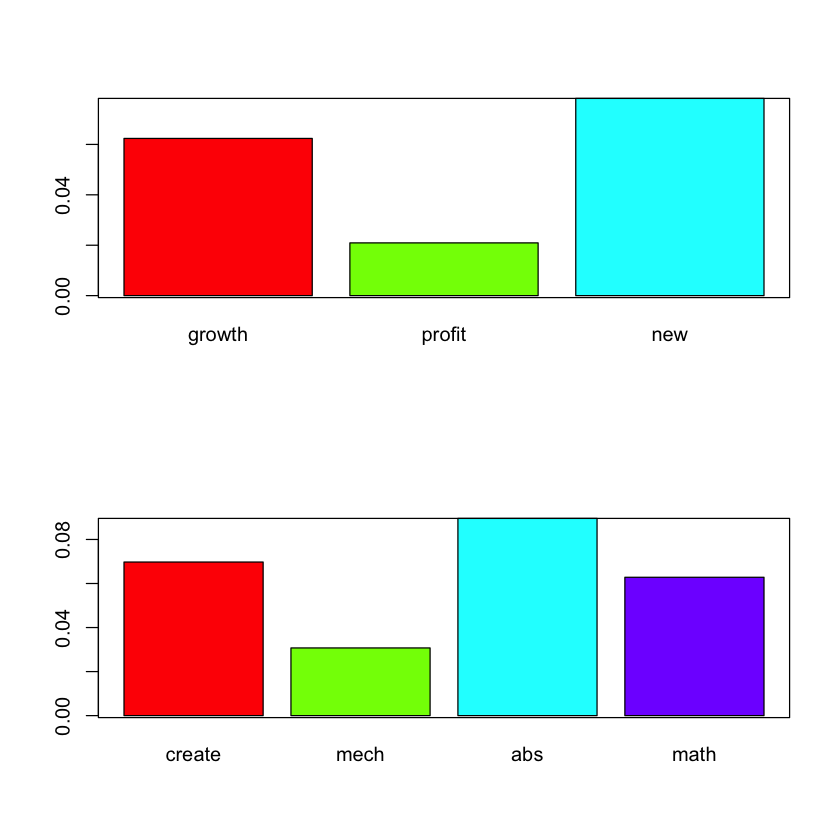

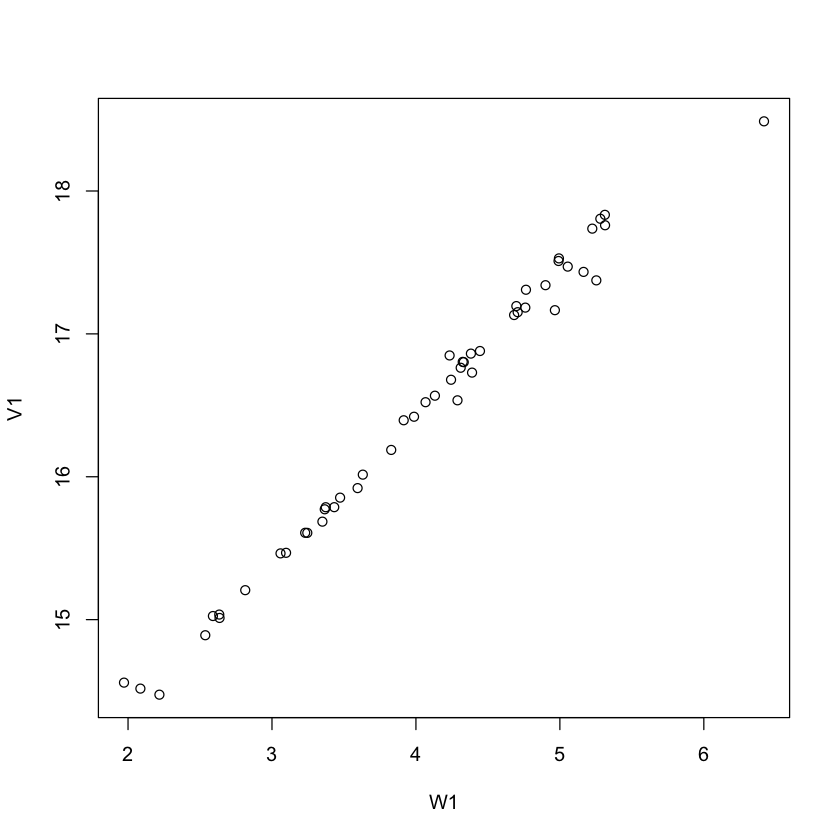

In [ ]:
# Slide 12:

par(mfrow=c(2,1))
barplot(A[,1],names.arg=names(Y),col=rainbow(4))
box()

barplot(B[,1],names.arg=names(X),col=rainbow(4))
box()
par(mfrow=c(1,1))


plot(as.matrix(X)%*%B[,1], as.matrix(Y)%*%A[,1], xlab="W1",ylab="V1")


In [ ]:
# Slide 16:

#values:

my.Q<-rev(cumprod(1-rev(my.cor)^2))
my.Q

[1] 0.002148472 0.195241267 0.852846693

In [ ]:
# Slide 21:
nu<-c(sqrt(7),2,1)
f1<-c(12,6,2)
f2<-nu*(50-5)-f1/2+1

my.F<-((1-my.Q^(1/nu))/my.Q^(1/nu))*f2/f1
p_F<-1-pf(my.F,f1,f2)
my.chisq<--(50-5)*log(my.Q)
p_chisq<-1-pchisq(my.chisq,df=c(12,6,2))

data.frame(my.Q, f1,f2,"F(f1,f2)"=my.F,p_F=format.pval(p_F,digits=1,eps=0.0001),
"Chisq_12,6,2"=my.chisq,p_chisq=format.pval(p_chisq,digits=1,eps=0.0001))


my.Q,f1,f2,F.f1.f2.,p_F,Chisq_12.6.2,p_chisq
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
0.002148472,12,114.0588,87.391525,<1e-04,276.434921,<1e-04
0.195241267,6,88.0000,18.526265,<1e-04,73.508365,<1e-04
0.852846693,2,45.0000,3.882233,0.03,7.162896,0.03


In [ ]:
# Slide 22:


# Using p.asym:
library(CCP)
p.asym(my.cor,n,p,q, tstat="Wilks")

ERROR: Error: object 'p' not found


In [ ]:
# After you define Y and X:
n <- nrow(salesdata)   # sample size
p <- ncol(Y)           # # of variables in Y
q <- ncol(X)           # # of variables in X

# Get canonical correlations (vector)
rhos <- cancor(Y, X)$cor  # safer and clearer than eigen(E1)$values^0.5

# Asymptotic tests (Wilks' Lambda by default)
library(CCP)
out <- p.asym(rho = rhos, N = n, p = p, q = q, tstat = "Wilks")
out


Wilks' Lambda, using F-approximation (Rao's F):
                stat    approx df1      df2      p.value
1 to 3:  0.002148472 87.391525  12 114.0588 0.000000e+00
2 to 3:  0.195241267 18.526265   6  88.0000 8.248957e-14
3 to 3:  0.852846693  3.882233   2  45.0000 2.783536e-02


$id
[1] "Wilks"

$stat
[1] 0.002148472 0.195241267 0.852846693

$approx
[1] 87.391525 18.526265  3.882233

$df1
[1] 12  6  2

$df2
[1] 114.0588  88.0000  45.0000

$p.value
[1] 0.000000e+00 8.248957e-14 2.783536e-02

In [ ]:
# Slide 23:

V<-as.data.frame(as.matrix(Y)%*%A)
W<-as.data.frame(as.matrix(X)%*%B[,1:3])
names(V)<-c("V1","V2","V3")
names(W)<-c("W1","W2","W3")

my.cor<-cor(cbind(Y,X,V,W))
round(my.cor,digits=2)

,growth,profit,new,create,mech,abs,math,V1,V2,V3,W1,W2,W3
growth,1.00,0.93,0.88,0.57,0.71,0.67,0.93,0.98,0.00,-0.20,0.97,0.00,-0.08
profit,0.93,1.00,0.84,0.54,0.75,0.47,0.94,0.95,0.32,0.01,0.94,0.28,0.00
new,0.88,0.84,1.00,0.70,0.64,0.64,0.85,0.95,-0.19,0.24,0.95,-0.16,0.09
create,0.57,0.54,0.70,1.00,0.59,0.15,0.41,0.63,-0.19,0.25,0.64,-0.22,0.65
mech,0.71,0.75,0.64,0.59,1.00,0.39,0.57,0.72,0.21,-0.03,0.72,0.24,-0.07
abs,0.67,0.47,0.64,0.15,0.39,1.00,0.57,0.64,-0.44,-0.22,0.65,-0.50,-0.57
math,0.93,0.94,0.85,0.41,0.57,0.57,1.00,0.94,0.17,-0.04,0.94,0.20,-0.09
V1,0.98,0.95,0.95,0.63,0.72,0.64,0.94,1.00,0.00,0.00,0.99,0.00,0.00
V2,0.00,0.32,-0.19,-0.19,0.21,-0.44,0.17,0.00,1.00,0.00,0.00,0.88,0.00
V3,-0.20,0.01,0.24,0.25,-0.03,-0.22,-0.04,0.00,0.00,1.00,0.00,0.00,0.38


[1] 0.9999932

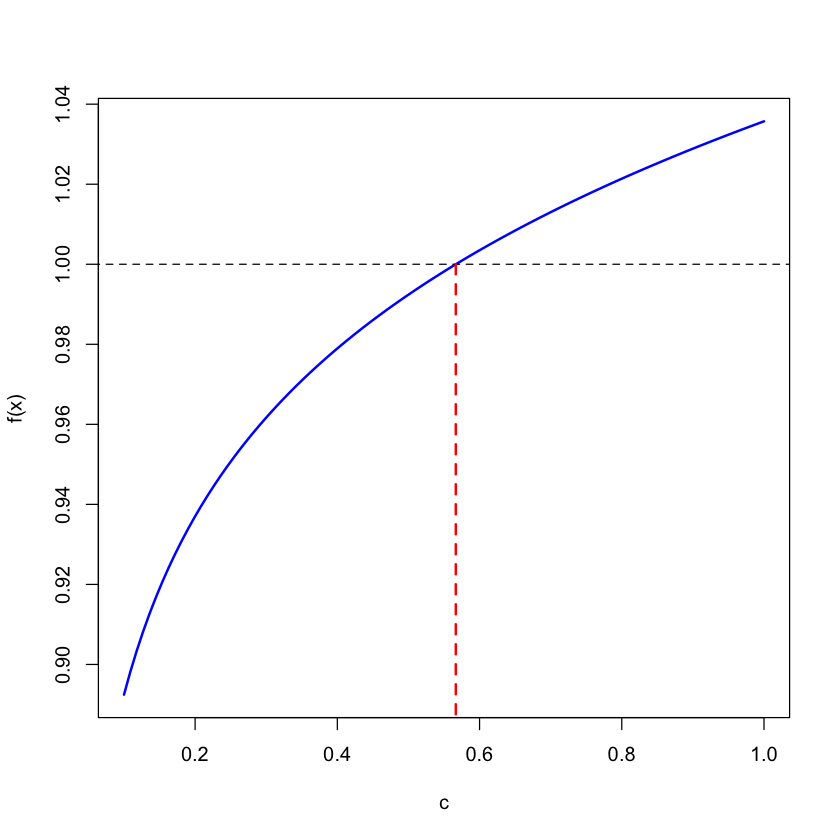

In [ ]:
# Slide 50:

f<-function(c){2*pnorm((log(c)-6.5)/sqrt(13))+pnorm((log(c)+6.5)/sqrt(13))}

curve(f,0.1,1,xlab='c',lwd=2,col="blue")
lines(0:2,rep(1,3),lty=2)
lines(rep(0.5666,2),c(1,par("usr")[3]),col="red",lwd=2,type="l",lty=2)

#
f(0.5666)

In [ ]:
# Slide 51:

# misclassification probs:

pnorm((log(0.5666)-6.5)/sqrt(13))


1-pnorm((log(0.5666)+6.5)/sqrt(13))


# constant in the linear discriminator:

-t(c(4,2))%*%matrix(c(2,-1,-1,1),nrow=2)%*%c(4,2)/2+
t(c(1,1))%*%matrix(c(2,-1,-1,1),nrow=2)%*%c(1,1)/2-log(0.5666)

[1] 0.02497811

[1] 0.04996299

-8.931898
